# 2.14. MLP model from scratch in Python

We will be building Neural Network (Multi Layer Perceptron) model from scratch using Numpy in Python. Please check out the following list of `ingredients` (if you have not already done so), so that you can cook (code) the MLP model from scratch because this is going to be the most general MLP model that you can find anywhere on the net (without using any for loops, except for the epochs part :))!

> **Note**: I have already explained (in detail) most of the code sections in my previous chapters (like developing Activation function class, developing class for Cost function, etc). I will just put the list for you to go and check them out (so that I can skip the tedious work of explaining them again and concentrate more on the fun part). I know it will be laborious for you to visit each and every page, but **the fruits of the hard work is always sweet**.

**Ingredients**

* Activation functions
	
* Data Pre-processing
	* Scaling
	  * Standardization
      * Normalization
	* Encoding
      * Label Encoding
      * One-hot encoding
	* Data Augmentation
	* Train Test Split

* Performance Metrics

* Perceptron model
	* Neurons
	* Weights, Biases
	
* Terminologies - Part 1
  * Input, Output and Hidden layers
  * Notations 
  * Parameter Initialize
	
* Learning Algorithm
  * Cost function
  * Forward propagation
  * Back Propagation
	
* Terminologies - Part 2
  
  * Epochs, Iterations, Batch size, and learning rate
	
* Gradient Descent
  * Update law
  * Momentum
  * RMSProp		
  * Adam
  * LR Decay
  * Gradient exploding and Vanishing
	
* Variance/ Bias
  * Regularization
  * Drop-out
  * Early stopping
  * Batch normalization
	
* Numerical example (with code) - Forward pass and Backpropagation (step by step vectorized form)

* Shortcut to calculate forward pass and backpropagation across layers (**Very Important**)


Now that we have all the ingredients available, we are ready to code the most general `Neural Network (Multi Layer Perceptron) model` from scratch using Numpy in Python.

The structure/design of the code (recipe) will be similar to that of the `Tensorflow's Keras Sequential layers` just to get a taste of the MLP models.


#### Import essential libraries

In [ ]:
# numpy for linear algebra
import numpy as np

# matplotlib for plotting the loss functions and/or accuracy
import matplotlib.pyplot as plt

# loading iris dataset from sklearn
from sklearn.datasets import load_iris

# confusion matrix
from sklearn.metrics import confusion_matrix

# accuracy score
from sklearn.metrics import accuracy_score

# show progress bar
from tqdm import tqdm

#### [Activation class](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/activation.html)

This class will contain class methods to calculate activation functions and also it will calculate the forward propagation and backpropagation as per the decsription in the chapter [Shortcut to calculate forward pass and backpropagation across layers](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/shortcut_to_calculate_forward_back_propagation.html) (link to previous chapter).

![](images/activation.png)

In [ ]:
class Activation:

    def __init__(self, activation_type=None):
        '''
        Parameters
        
        activation_type: type of activation
        available options are 'sigmoid', 'linear', 'tanh', 'softmax', 'prelu' and 'relu'
        '''
        if activation_type is None:
            self.activation_type = 'linear'
        else:
            self.activation_type = activation_type

    def linear(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return x

    def d_linear(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return np.ones(x.shape)

    def sigmoid(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return 1/(1+np.exp(-x))

    def d_sigmoid(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return self.sigmoid(x) * (1-self.sigmoid(x))

    def tanh(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    def d_tanh(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return 1-(self.tanh(x))**2

    def ReLU(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return x * (x > 0)

    def d_ReLU(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        return (x>0)*np.ones(x.shape)

    def PReLU(self, x, alpha=0.2):
        '''
        Parameters
        alpha: slope parameter (𝛼)

        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (or rows)
        and 'd' is the number of features (or columns)
        '''
        return np.where(x > 0, x, alpha*x) 

    def d_PReLU(self, x, alpha=0.2):
        '''
        Parameters
        alpha: slope parameter (𝛼)

        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (or rows)
        and 'd' is the number of features (or columns)
        '''
        return np.where(x > 0, 1, alpha) 

    def softmax(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        z = x - np.max(x, axis=-1, keepdims=True)
        numerator = np.exp(z)
        denominator = np.sum(numerator, axis=-1, keepdims=True)
        softmax = numerator / denominator
        return softmax

    def d_softmax(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        if len(x.shape)==1:
            x = np.array(x).reshape(1,-1)
        else:
            x = np.array(x)
        m, d = x.shape
        a = self.softmax(x)
        tensor1 = np.einsum('ij,ik->ijk', a, a)
        tensor2 = np.einsum('ij,jk->ijk', a, np.eye(d, d))
        return tensor2 - tensor1

    def get_activation(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        if self.activation_type == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation_type == 'tanh':
            return self.tanh(x)
        elif self.activation_type == 'relu':
            return self.ReLU(x)
        elif self.activation_type == 'linear':
            return self.linear(x)
        elif self.activation_type == 'prelu':
            return self.PReLU(x)
        elif self.activation_type == 'softmax':
            return self.softmax(x)
        else:
            raise ValueError("Valid Activations are only 'sigmoid', 'linear', 'tanh' 'softmax', 'prelu' and 'relu'")

    def get_d_activation(self, x):
        '''
        Parameters
        
        x: input matrix of shape (m, d) 
        where 'm' is the number of samples (in case of batch gradient descent of size m)
        and 'd' is the number of features
        '''
        if self.activation_type == 'sigmoid':
            return self.d_sigmoid(x)
        elif self.activation_type == 'tanh':
            return self.d_tanh(x)
        elif self.activation_type == 'relu':
            return self.d_ReLU(x)
        elif self.activation_type == 'linear':
            return self.d_linear(x)
        elif self.activation_type == 'prelu':
            return self.d_PReLU(x)
        elif self.activation_type == 'softmax':
            return self.d_softmax(x)
        else:
            raise ValueError("Valid Activations are only 'sigmoid', 'linear', 'tanh', 'softmax', 'prelu' and 'relu'")

    def forward(self, X):
        self.X = X
        z = self.get_activation(X)
        return z
    
    def backpropagation(self, dz):
        f_prime = self.get_d_activation(self.X)
        if self.activation_type=='softmax':
            # because derivative of softmax is a tensor
            dx = np.einsum('ijk,ik->ij', f_prime, dz)
        else:
            dx = dz * f_prime
        return dx

#### [Cost function](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/cost_functions.html) 

Follow the lecture to develop the cost function class

In [ ]:
class Cost:

    def __init__(self, cost_type='mse'):
        '''
        Parameters
        
        cost_type: type of cost function
        available options are 'mse', and 'cross-entropy'
        '''
        self.cost_type = cost_type

    def mse(self, a, y):
        '''
        Parameters
        
        a: Predicted output array of shape (m, d)
        y: Actual output array of shape (m, d)
        '''
        return (1/2)*np.sum((np.linalg.norm(a-y, axis=1))**2)

    def d_mse(self, a, y):
        '''
        represents dJ/da

        Parameters
        
        a: Predicted output array of shape (m, d)
        y: Actual output array of shape (m, d)
        '''
        return a - y

    def cross_entropy(self, a, y, epsilon=1e-12):
        '''
        Parameters
        
        a: Predicted output array of shape (m, d)
        y: Actual output array of shape (m, d)
        '''
        a = np.clip(a, epsilon, 1. - epsilon)
        return -np.sum(y*np.log(a))

    def d_cross_entropy(self, a, y, epsilon=1e-12):
        '''
        represents dJ/da

        Parameters
        
        a: Predicted output array of shape (m, d)
        y: Actual output array of shape (m, d)
        '''
        a = np.clip(a, epsilon, 1. - epsilon)
        return -y/a

    def get_cost(self, a, y):
        '''
        Parameters
        
        a: Predicted output array of shape (m, d)
        y: Actual output array of shape (m, d)
        '''
        if self.cost_type == 'mse':
            return self.mse(a, y)
        elif self.cost_type == 'cross-entropy':
            return self.cross_entropy(a, y)
        else:
            raise ValueError("Valid cost functions are only 'mse', and 'cross-entropy'")

    def get_d_cost(self, a, y):
        '''
        Parameters
        
        a: Predicted output array of shape (m, d)
        y: Actual output array of shape (m, d)
        '''
        if self.cost_type == 'mse':
            return self.d_mse(a, y)
        elif self.cost_type == 'cross-entropy':
            return self.d_cross_entropy(a, y)
        else:
            raise ValueError("Valid cost functions are only 'mse', and 'cross-entropy'")

#### [Optimizers](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/gradient_descent.html)

This class contains different optimizers (such as RMSProp, Adam, etc) used for updating the parameters.

In [ ]:
class Optimizer:

    def __init__(self, optimizer_type=None, shape_W=None, shape_b=None,
                 momentum1=0.9, momentum2=0.999, epsilon=1e-8):
        '''
        Parameters

        momentum1: float hyperparameter >= 0 that accelerates gradient descent in the relevant 
                   direction and dampens oscillations. Defaults to 0, i.e., vanilla gradient descent.
                   Also used in RMSProp
        momentum2: used in Adam only
        optimizer_type: type of optimizer
                        available options are 'gd', 'sgd' (This also includes momentum), 'adam', and 'rmsprop'
        shape_W: Shape of the weight matrix W
        shape_b: Shape of the bias matrix b
        epsilon: parameter used in RMSProp and Adam to avoid division by zero error
        '''

        if optimizer_type is None:
            self.optimizer_type = 'adam'
        else:
            self.optimizer_type = optimizer_type
        self.momentum1 = momentum1
        self.momentum2 = momentum2
        self.epsilon = epsilon

        self.vdW = np.zeros(shape_W)
        self.vdb = np.zeros(shape_b)

        self.SdW = np.zeros(shape_W)
        self.Sdb = np.zeros(shape_b)

    def GD(self, dW, db, k):
        '''
        dW: gradient of Weight W for iteration k
        db: gradient of bias b for iteration k
        k: iteration number
        '''
        return dW, db

    def SGD(self, dW, db, k):
        '''
        dW: gradient of Weight W for iteration k
        db: gradient of bias b for iteration k
        k: iteration number
        '''
        self.vdW = self.momentum1*self.vdW + (1-self.momentum1)*dW
        self.vdb = self.momentum1*self.vdb + (1-self.momentum1)*db

        return self.vdW, self.vdb

    def RMSProp(self, dW, db, k):
        '''
        dW: gradient of Weight W for iteration k
        db: gradient of bias b for iteration k
        k: iteration number
        '''
        self.SdW = self.momentum2*self.SdW + (1-self.momentum2)*(dW**2)
        self.Sdb = self.momentum2*self.Sdb + (1-self.momentum2)*(db**2)

        den_W = np.sqrt(self.SdW) + self.epsilon
        den_b = np.sqrt(self.Sdb) + self.epsilon

        return dW/den_W, db/den_b

    def Adam(self, dW, db, k):
        '''
        dW: gradient of Weight W for iteration k
        db: gradient of bias b for iteration k
        k: iteration number
        '''
        # momentum
        self.vdW = self.momentum1*self.vdW + (1-self.momentum1)*dW
        self.vdb = self.momentum1*self.vdb + (1-self.momentum1)*db

        # rmsprop
        self.SdW = self.momentum2*self.SdW + (1-self.momentum2)*(dW**2)
        self.Sdb = self.momentum2*self.Sdb + (1-self.momentum2)*(db**2)

        # correction
        if k>1:
            vdW_h = self.vdW / (1-(self.momentum1**k))
            vdb_h = self.vdb / (1-(self.momentum1**k))
            SdW_h = self.SdW / (1-(self.momentum2**k))
            Sdb_h = self.Sdb / (1-(self.momentum2**k))
        else:
            vdW_h = self.vdW 
            vdb_h = self.vdb
            SdW_h = self.SdW
            Sdb_h = self.Sdb

        den_W = np.sqrt(SdW_h) + self.epsilon
        den_b = np.sqrt(Sdb_h) + self.epsilon

        return vdW_h/den_W, vdb_h/den_b

    def get_optimization(self, dW, db, k):
        if self.optimizer_type == 'gd':
            return self.GD(dW, db, k)
        if self.optimizer_type == 'sgd':
            return self.SGD(dW, db, k)
        if self.optimizer_type == 'rmsprop':
            return self.RMSProp(dW, db, k)
        if self.optimizer_type == 'adam':
            return self.Adam(dW, db, k)
        else:
            raise ValueError("Valid optimizer options are only 'gd', 'sgd', 'rmsprop', and 'adam'.")

#### [Learning Rate decay](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/gradient_descent.html#learning-rate-decay)

This class contains different methods to implement the learning rate decay scheduler.

In [ ]:
class LearningRateDecay:

    def __init__(self):
        pass

    def constant(self, t, lr_0):
        '''
        t: iteration
        lr_0: initial learning rate
        '''
        return lr_0

    def time_decay(self, t, lr_0, k):
        '''
        lr_0: initial learning rate
        k: Decay rate
        t: iteration number
        '''
        lr = lr_0 /(1+(k*t))
        return lr

    def step_decay(self, t, lr_0, F, D):
        '''
        lr_0: initial learning rate
        F: factor value controlling the rate in which the learning date drops
        D: “Drop every” iteration
        t: current iteration
        '''
        mult = F**np.floor((1+t)/D)
        lr = lr_0 * mult
        return lr

    def exponential_decay(self, t, lr_0, k):
        '''
        lr_0: initial learning rate
        k: Exponential Decay rate
        t: iteration number
        '''
        lr = lr_0 * np.exp(-k*t)
        return lr

#### [Utility function](https://pythonandml.github.io/dlbook/content/preliminaries/data_preprocessing.html)

This class contains several utility functions such as one-hot vector, label encoder, normalization, etc

In [ ]:
class Utility:

    def __init__(self):
        pass

    def label_encoding(self, Y):
        '''
        Parameters:
        Y: (m,d) shape matrix with categorical data
        Return
        result: label encoded data of 𝑌
        idx_list: list of the dictionaries containing the unique values 
                  of the columns and their mapping to the integer.
        '''
        idx_list = []
        result = []
        for col in range(Y.shape[1]):
            indexes = {val: idx for idx, val in enumerate(np.unique(Y[:, col]))}
            result.append([indexes[s] for s in Y[:, col]])
            idx_list.append(indexes)
        return np.array(result).T, idx_list

    def onehot(self, X):
        '''
        Parameters:
        X: 1D array of labels of length "m"
        Return
        X_onehot: (m,d) one hot encoded matrix (one-hot of X) 
                  (where d is the number of unique values in X)
        indexes: dictionary containing the unique values of X and their mapping to the integer column
        '''
        indexes = {val: idx for idx, val in enumerate(np.unique(X))}
        y = np.array([indexes[s] for s in X])
        X_onehot = np.zeros((y.size, len(indexes)))
        X_onehot[np.arange(y.size), y] = 1
        return X_onehot, indexes

    def minmax(self, X, min_X=None, max_X=None):
        if min_X is None:
            min_X = np.min(X, axis=0)
        if max_X is None:
            max_X = np.max(X, axis=0)
        Z = (X - min_X) / (max_X - min_X)
        return Z, min_X, max_X

    def standardize(self, X, mu=None, std=None):
        if mu is None:
            mu = np.mean(X, axis=0)
        if std is None:
            std = np.std(X, axis=0)
        Z = (X - mu) / std
        return Z, mu, std

    def inv_standardize(self, Z, mu, std):
        X = Z*std + mu
        return X

    def train_test_split(self, X, y, test_ratio=0.2, seed=None):
        if seed is not None:
            np.random.seed(seed)
        train_ratio = 1-test_ratio
        indices = np.random.permutation(X.shape[0])
        train_idx, test_idx = indices[:int(train_ratio*len(X))], indices[int(train_ratio*len(X)):]
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]
        return X_train, X_test, y_train, y_test

#### [Weights initializer class](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/terminologies_part_1.html#parameter-s-initialization)

In [ ]:
class Weights_initializer:

    def __init__(self, shape, initializer_type=None, seed=None):
        '''
        Parameters
        shape: Shape of the weight matrix

        initializer_type: type of weight initializer
        available options are 'zeros', 'ones', 'random_normal', 'random_uniform', 
        'he_normal', 'xavier_normal' and 'glorot_normal'
        '''
        self.shape = shape
        if initializer_type is None:
            self.initializer_type = "he_normal"
        else:
            self.initializer_type = initializer_type
        self.seed = seed
        
    def zeros_initializer(self):
        if self.seed is not None:
            np.random.seed(self.seed)
        return np.zeros(self.shape)

    def ones_initializer(self):
        if self.seed is not None:
            np.random.seed(self.seed)
        return np.ones(self.shape)

    def random_normal_initializer(self):
        if self.seed is not None:
            np.random.seed(self.seed)
        return np.random.normal(size=self.shape)

    def random_uniform_initializer(self):
        if self.seed is not None:
            np.random.seed(self.seed)
        return np.random.uniform(size=self.shape)

    def he_initializer(self):
        if self.seed is not None:
            np.random.seed(self.seed)
        s0, s1 = self.shape
        return np.random.randn(s0, s1) * np.sqrt(2/s0)

    def xavier_initializer(self):
        '''
        shape: Shape of the weight matrix.
        '''
        if self.seed is not None:
            np.random.seed(self.seed)
        s0, s1 = self.shape
        return np.random.randn(s0, s1) * np.sqrt(1/s0)

    def glorot_initializer(self):
        '''
        shape: Shape of the weight matrix.
        '''
        if self.seed is not None:
            np.random.seed(self.seed)
        s0, s1 = self.shape
        return np.random.randn(s0, s1) * np.sqrt(2/(s0+s1))

    def get_initializer(self):
        if self.initializer_type == 'zeros':
            return self.zeros_initializer()
        elif self.initializer_type == 'ones':
            return self.ones_initializer()
        elif self.initializer_type == 'random_normal':
            return self.random_normal_initializer()
        elif self.initializer_type == 'random_uniform':
            return self.random_uniform_initializer()
        elif self.initializer_type == 'he_normal':
            return self.he_initializer()
        elif self.initializer_type == 'xavier_normal':
            return self.xavier_initializer()
        elif self.initializer_type == 'glorot_normal':
            return self.glorot_initializer()
        else:
            raise ValueError("Valid initializer options are 'zeros', 'ones', 'random_normal', 'random_uniform', 'he_normal', 'xavier_normal', and 'glorot_normal'")

#### Dense class

Dense class implements the operation: 

$$
z = XW + b^T
$$

$$
a = f(z) 
$$

where activation $f(.)$ is used if specified, else we do not use it. $W$ is a weights matrix created by the Dense layer based on [type of initialization](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/terminologies_part_1.html#parameter-s-initialization) (link to previous chapter) provided, and $b$ is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.

![](images/dense.png)

In [ ]:
class Dense:

    def __init__(self, neurons, activation_type=None, use_bias=True, 
                 weight_initializer_type=None, weight_regularizer=None, seed=None, input_dim=None):

        '''
        Parameters:

        neurons: Positive integer (number of neurons), dimensionality of the output

        activation_type: type of activation
                         available options are 'sigmoid', 'linear', 'tanh', 'softmax', 'prelu' and 'relu'
                         If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

        use_bias: Boolean, whether the layer uses a bias vector.
        
        weight_initializer_type: Initializer for the kernel weights matrix.
        
        weight_regularizer: Tuple, Regularizer function applied to the weights matrix ('L2', 0.01) or ('L1', 2)

        seed: To generate reproducable results

        input_dim: integer showing number of neurons in input layer 
        '''
        self.neurons = neurons
        self.activation = Activation(activation_type=activation_type)
        self.use_bias = use_bias
        self.weight_initializer_type = weight_initializer_type # none is handled
        if weight_regularizer is None:
            self.weight_regularizer = ('L2', 0)
        else:
            self.weight_regularizer = weight_regularizer
        self.seed = seed
        self.input_dim = input_dim

    def initialize_parameters(self, hl, optimizer_type):
        '''
        hl: Number of neurons in layer l-1
        '''
        shape_W = (hl, self.neurons)
        shape_b = (self.neurons, 1)
        initializer = Weights_initializer(shape=shape_W,
                                          initializer_type=self.weight_initializer_type,
                                          seed=self.seed)
        self.W = initializer.get_initializer()
        self.b = np.zeros(shape_b)
        
        self.optimizer = Optimizer(optimizer_type=optimizer_type, shape_W=shape_W, shape_b=shape_b)

        
    def forward(self, X):
        self.X = X
        r = X @ self.W
        self.z = r + self.b.T
        a = self.activation.forward(self.z)
        return a
    
    def backpropagation(self, da):
        dz = self.activation.backpropagation(da)
        dr = dz.copy()
        self.db = np.sum(dz, axis=0).reshape(-1,1)
        self.dW = (self.X.T) @ dr
        dX = dr @ (self.W.T)
        return dX

    def update(self, lr, m, k):
        '''
        Parameters:

        lr: learning rate
        m: batch_size (sumber of samples in batch)
        k: iteration_number
        '''
        dW, db = self.optimizer.get_optimization(self.dW, self.db, k)

        if self.weight_regularizer[0].lower()=='l2':
            dW += self.weight_regularizer[1] * self.W
        elif self.weight_regularizer[0].lower()=='l1':
            dW += self.weight_regularizer[1] * np.sign(self.W)
        
        self.W -= dW*(lr/m)
        if self.use_bias:
            self.b -= db*(lr/m)

#### [Dropout class](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/dropout.html)

This class will perform forward and backpropagation for a Dropout layer



![](images/dropout.png)

In [ ]:
class Dropout:

    def __init__(self, p):
        '''
        Parameters

        p: Dropout probability
        '''
        self.p = p
        if self.p == 0:
            self.p += 1e-6
        if self.p == 1:
            self.p -= 1e-6
    
    def forward(self, X):
        self.mask = (np.random.rand(*X.shape) < self.p) / self.p 
        Z = X * self.mask
        return Z
    
    def backpropagation(self, dZ):
        dX = dZ * self.mask
        return dX

#### [Batch Normalization class](https://pythonandml.github.io/dlbook/content/multilayer_perceptrons/batch_normalization.html)

This class will perform forward and backpropagation for Batch Normalization layer



![](images/batch_norm.png)

> **Note:** We will initialise $\gamma$ as ones and $\beta$ as zeroes so that the output of the linear batch-norm transformation initially follows the standard zero-mean unit-variance normal distribution. This provides a normalised starting point, for which the model can update the $\gamma$ and $\beta$ to scale and shift the distribution(s) of each input accordingly (for the current layer).

**Forward pass**

`eps` represents: $\epsilon$

`mu` represents: $\mu$

`var` represents: $\sigma^2$

`zmu` represents: $\bar{z_l}$

`ivar` represents: $\frac{1}{\sqrt{\sigma^2 + \epsilon}}$

`zhat` represents: $\hat{z_l}$

`q` represents: $q_l$

**Backpropagation**

This `dq` variable below represents $\frac{\partial J}{\partial q_l}$

`dgamma` represents: $\frac{\partial J}{\partial \gamma}$

`dbeta` represents: $\frac{\partial J}{\partial \beta}$

`dzhat` represents: $\frac{\partial J}{\partial \hat{z_l}}$

`dvar` represents: $\frac{\partial J}{\partial \sigma^2}$

`dmu` represents: $\frac{\partial J}{\partial \mu}$

`dz` represents: $\frac{\partial J}{\partial z_l}$

In [ ]:
class BatchNormalization:

    def __init__(self, momentum=0.9, epsilon=1e-6):
        '''
        Parameters

        momentum: Momentum for the moving average
        epsilon: 𝜖, Small float added to variance to avoid dividing by zero
        '''
        self.epsilon = epsilon
        self.momentum = momentum
    
    def initialize_parameters(self, d):
        '''
        d: Shape of input to BN layer
        '''
        self.gamma = np.ones((d))
        self.beta = np.zeros((d))
        self.running_mean = np.zeros((d))
        self.running_var = np.zeros((d))
    
    def forward(self, z, mode='train'):
        '''
        z: Input to BN layer
        mode: forward pass used for train or test
        ''' 
        if mode=='train':
            self.m, self.d = z.shape
            self.mu = np.mean(z, axis = 0) # 𝜇
            self.var = np.var(z, axis=0) # 𝜎^2
            self.zmu = z - self.mu # z - 𝜇
            self.ivar = 1 / np.sqrt(self.var + self.epsilon) # 𝜎𝑖𝑛𝑣
            self.zhat = self.zmu * self.ivar 
            q = self.gamma*self.zhat + self.beta # ql
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * self.mu
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * self.var
        elif mode=='test':
            q = (z - self.running_mean) / np.sqrt(self.running_var + self.epsilon)
            q = self.gamma*q + self.beta
        else:
            raise ValueError('Invalid forward batchnorm mode "%s"' % mode)
        return q

    def backpropagation(self, dq):
        self.dgamma = np.sum(dq * self.zhat, axis=0)
        self.dbeta = np.sum(dq, axis=0)
        dzhat = dq * self.gamma
        dvar = np.sum(dzhat * self.zmu * (-.5) * (self.ivar**3), axis=0)
        dmu = np.sum(dzhat * (-self.ivar), axis=0)
        dz = dzhat * self.ivar + dvar * (2/self.m) * self.zmu + (1/self.m)*dmu
        return dz

    def update(self, lr, m, k):
        '''
        Parameters:

        lr: learning rate
        m: batch_size (sumber of samples in batch)
        k: iteration_number
        '''
        self.gamma -= self.dgamma*(lr/m)
        self.beta -= self.dbeta*(lr/m)

#### MLP

This class finally contains the compile, summary, fit, predict, etc methods for executing our MLP model.

In [ ]:
class MLP:

    def __init__(self, layers=None):
        '''
        This is a sequential MLP model
        '''
        if layers is None:
            self.layers = []
        else:
            self.layers = layers
        self.network_architecture_called = False

    def add(self, layer):
        # adds a layer to MLP model
        self.layers.append(layer)

    def Input(self, input_dim):
        '''
        input_dim: integer showing number of neurons in input layer 
        '''
        self.d = input_dim
        self.architecture = [self.d]
        self.layer_name = ["Input"]
    
    def network_architecture(self):
        for layer in self.layers:
            if layer.__class__.__name__=='Dense':
                if layer.input_dim is not None:
                    self.Input(layer.input_dim)    
                self.architecture.append(layer.neurons)
                self.layer_name.append(layer.__class__.__name__)
            else:
                self.architecture.append(self.architecture[-1])
                self.layer_name.append(layer.__class__.__name__)

    def summary(self):
        if self.network_architecture_called==False:
            self.network_architecture()
            self.network_architecture_called = True
        len_assigned = [45, 26, 15]
        count = {'Dense': 1, 'Activation': 1, 'Input': 1,
                'BatchNormalization': 1, 'Dropout': 1}

        col_names = ['Layer (type)', 'Output Shape', '# of Parameters']

        print("Model: MLP")
        print('-'*sum(len_assigned))

        text = ''
        for i in range(3):
            text += col_names[i] + ' '*(len_assigned[i]-len(col_names[i]))
        print(text)

        print('='*sum(len_assigned))

        total_params = 0
        trainable_params = 0
        non_trainable_params = 0

        for i in range(len(self.layer_name)):
            # layer name
            layer_name = self.layer_name[i]
            name = layer_name.lower() + '_' + str(count[layer_name]) + ' ' + '(' + layer_name + ')'
            count[layer_name] += 1

            # output shape
            out = '(None, ' + str(self.architecture[i]) + ')'

            # number of params
            if layer_name=='Dense':
                h0 = self.architecture[i-1]
                h1 = self.architecture[i]
                if self.layers[i-1].use_bias:
                    params = h0*h1 + h1
                else:
                    params = h0*h1
                total_params += params
                trainable_params += params
            elif layer_name=='BatchNormalization':
                h = self.architecture[i]
                params = 4*h
                trainable_params += 2*h
                non_trainable_params += 2*h
                total_params += params
            else:
                params = 0
            names = [name, out, str(params)]

            # print this row
            text = ''
            for j in range(3):
                text += names[j] + ' '*(len_assigned[j]-len(names[j]))
            print(text)
            if i!=(len(self.layer_name)-1):
                print('-'*sum(len_assigned))
            else:
                print('='*sum(len_assigned))

        print("Total params:", total_params)
        print("Trainable params:", trainable_params)
        print("Non-trainable params:", non_trainable_params)
        print('-'*sum(len_assigned))

    def compile(self, cost_type, optimizer_type):
        self.cost = Cost(cost_type)
        self.cost_type = cost_type
        self.optimizer_type = optimizer_type

    def initialize_parameters(self):
        if self.network_architecture_called==False:
            self.network_architecture()
            self.network_architecture_called = True
        # initialize parameters for different layers
        for i, layer in enumerate(self.layers):
            if layer.__class__.__name__=='Dense':
                layer.initialize_parameters(self.architecture[i], self.optimizer_type)
            elif layer.__class__.__name__=='BatchNormalization':
                layer.initialize_parameters(self.architecture[i])

    def fit(self, X, y, epochs=10, batch_size=5, lr=1, X_val=None, y_val=None, verbose=1, lr_decay=None, **kwargs):
        
        self.history = {'Training Loss': [],
                        'Validation Loss': [],
                        'Training Accuracy': [],
                        'Validation Accuracy': []}

        iterations = 0
        self.m = batch_size
        self.initialize_parameters()
        
        self.layers = [layer for layer in self.layers if layer is not None]

        for epoch in range(epochs):
            cost_train = 0
            num_batches = 0
            y_pred_train = []
            y_train = []
            
            print('Epoch: ' + str(epoch+1) + '/' + str(epochs), end=' ')

            for i in tqdm(range(0, len(X), batch_size)):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                Z = X_batch.copy()
                # feed-forward
                for layer in self.layers:
                    Z = layer.forward(Z)

                # calculating training accuracy
                if self.cost_type=='cross-entropy':
                    y_pred_train += np.argmax(Z, axis=1).tolist()
                    y_train += np.argmax(y_batch, axis=1).tolist()
                
                # calculating the loss
                cost_train += self.cost.get_cost(Z, y_batch) / self.m

                # calculating dL/daL (last layer backprop error)
                dZ = self.cost.get_d_cost(Z, y_batch)
                
                # backpropagation
                for layer in self.layers[::-1]:
                    dZ = layer.backpropagation(dZ)

                # Parameters update
                for layer in self.layers:
                    if layer.__class__.__name__==('Dense' or 'BatchNormalization'):
                        layer.update(lr, self.m, iterations)

                # Learning rate decay
                if lr_decay is not None:
                    lr = lr_decay(iterations, **kwargs)

                num_batches += 1
                iterations += 1
            
            cost_train /= num_batches

            # printing purpose only (Training Accuracy, Validation loss and accuracy)

            text  = 'Training Loss: ' + str(round(cost_train, 4)) + ' - '
            self.history['Training Loss'].append(cost_train)

            # training accuracy

            if self.cost_type=='cross-entropy':
                accuracy_train = np.sum(np.array(y_pred_train) == np.array(y_train)) / len(y_train)
                text += 'Training Accuracy: ' + str(round(accuracy_train, 4))
                self.history['Training Accuracy'].append(accuracy_train)
            else:
                text += 'Training Accuracy: ' + str(round(cost_train, 4))
                self.history['Training Accuracy'].append(cost_train)
            
            if X_val is not None:
                cost_val, accuracy_val = self.evaluate(X_val, y_val, batch_size)
                text += ' - Validation Loss: ' + str(round(cost_val, 4)) + ' - '
                self.history['Validation Loss'].append(cost_val)
                text += 'Validation Accuracy: ' + str(round(accuracy_val, 4))
                self.history['Validation Accuracy'].append(accuracy_val)

            if verbose:
                print(text)
            else:
                print()

    def evaluate(self, X, y, batch_size=None):
        
        if batch_size is None:
            batch_size = len(X)

        cost = 0
        correct = 0
        num_batches = 0
        utility = Utility()
        Y_1hot, _ = utility.onehot(y)

        for i in tqdm(range(0, len(X), batch_size)):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            Y_1hot_batch = Y_1hot[i:i+batch_size]
            Z = X_batch.copy()
            for layer in self.layers:
                if layer.__class__.__name__=='BatchNormalization':
                    Z = layer.forward(Z, mode='test')
                else:
                    Z = layer.forward(Z)
            if self.cost_type=='cross-entropy':
                cost += self.cost.get_cost(Z, Y_1hot_batch) / len(y_batch)
                y_pred = np.argmax(Z, axis=1).tolist()
                correct += np.sum(y_pred == y_batch)
            else:
                cost += self.cost.get_cost(Z, y_batch) / len(y_batch)

            num_batches += 1

        if self.cost_type=='cross-entropy':
            accuracy = correct / len(y)
            cost /= num_batches
            return cost, accuracy
        else:
            cost /= num_batches
            return cost, cost

    def loss_plot(self):
        plt.plot(self.history['Training Loss'], 'k')
        if len(self.history['Validation Loss'])>0:
            plt.plot(self.history['Validation Loss'], 'r')
            plt.legend(['Train', 'Validation'], loc='upper right')
            plt.title('Model Loss')
        else:
            plt.title('Training Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.show()

    def accuracy_plot(self):
        plt.plot(self.history['Training Accuracy'], 'k')
        if len(self.history['Validation Accuracy'])>0:
            plt.plot(self.history['Validation Accuracy'], 'r')
            plt.legend(['Train', 'Validation'], loc='lower right')
            plt.title('Model Accuracy')
        else:
            plt.title('Training Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.show()

    def predict(self, X, batch_size=None):
        
        if batch_size==None:
            batch_size = len(X)

        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            Z = X_batch.copy()
            for layer in self.layers:
                if layer.__class__.__name__=='BatchNormalization':
                    Z = layer.forward(Z, mode='test')
                else:
                    Z = layer.forward(Z)
            if i==0:
                if self.cost_type=='cross-entropy':
                    y_pred = np.argmax(Z, axis=1).tolist()
                else:
                    y_pred = Z
            else:
                if self.cost_type=='cross-entropy':
                    y_pred += np.argmax(Z, axis=1).tolist()
                else:
                    y_pred = np.vstack((y_pred, Z))
        
        return np.array(y_pred)

### Validating model using Iris Dataset

Check this [page](https://archive.ics.uci.edu/ml/datasets/iris) (link to an external website) to know more about **Iris dataset**

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

utility = Utility()

# train test split
X_train, X_test, y_train, y_test = utility.train_test_split(X, y, test_ratio=0.3, seed=42)

# standardize train data
X_train_std, mu_X_train, std_X_train = utility.standardize(X_train)

# use mean and std of train to standardize test data
X_test_std, _, _ = utility.standardize(X_test, mu_X_train, std_X_train)

# train validation split
X_train_new, X_val, y_train_new, y_val = utility.train_test_split(X_train_std, y_train, test_ratio=0.2, seed=42)

Y_1hot_train, _ = utility.onehot(y_train_new)

lr, epochs, batch_size = 0.1, 100, 2
input_dim = X_train_new.shape[1]
output_dim = Y_1hot_train.shape[1]

Building the MLP model

In [ ]:
model = MLP()
model.add(Dense(neurons=6, 
                activation_type='relu', 
                input_dim=input_dim, 
                seed=42, 
                weight_initializer_type='random_normal'))

model.add(Dense(neurons=output_dim, 
                activation_type='softmax', 
                weight_initializer_type='random_normal', 
                seed=42))

Printing the model summary (description). 

In [ ]:
model.summary()

Model: MLP
--------------------------------------------------------------------------------------
Layer (type)                                 Output Shape              # of Parameters
input_1 (Input)                              (None, 4)                 0              
--------------------------------------------------------------------------------------
dense_1 (Dense)                              (None, 6)                 30             
--------------------------------------------------------------------------------------
dense_2 (Dense)                              (None, 3)                 21             
Total params: 51
Trainable params: 51
Non-trainable params: 0
--------------------------------------------------------------------------------------


Compiling the MLP model (that is adding the cost and optimizer types)

In [ ]:
model.compile(cost_type='cross-entropy', optimizer_type='gd')

In [ ]:
# adding learning rate decay
LR_decay = LearningRateDecay()

# training the data
model.fit(X_train_new, Y_1hot_train, epochs=epochs, batch_size=batch_size, lr=lr, X_val=X_val, y_val=y_val, verbose=1,
          lr_decay=LR_decay.time_decay, lr_0=lr, k=lr/epochs)

Epoch: 1/100 

100%|██████████| 11/11 [00:00<00:00, 3224.58it/s]


Training Loss: 0.7243 - Training Accuracy: 0.5476 - Validation Loss: 0.4471 - Validation Accuracy: 0.7143
Epoch: 2/100 

100%|██████████| 11/11 [00:00<00:00, 1949.44it/s]


Training Loss: 0.4963 - Training Accuracy: 0.7381 - Validation Loss: 0.4185 - Validation Accuracy: 0.7143
Epoch: 3/100 

100%|██████████| 11/11 [00:00<00:00, 3577.65it/s]


Training Loss: 0.4477 - Training Accuracy: 0.7619 - Validation Loss: 0.3932 - Validation Accuracy: 0.7143
Epoch: 4/100 

100%|██████████| 11/11 [00:00<00:00, 3512.55it/s]


Training Loss: 0.4178 - Training Accuracy: 0.7738 - Validation Loss: 0.3741 - Validation Accuracy: 0.7619
Epoch: 5/100 

100%|██████████| 11/11 [00:00<00:00, 4690.66it/s]


Training Loss: 0.3956 - Training Accuracy: 0.7857 - Validation Loss: 0.3524 - Validation Accuracy: 0.7619
Epoch: 6/100 

100%|██████████| 11/11 [00:00<00:00, 3576.82it/s]


Training Loss: 0.3789 - Training Accuracy: 0.7857 - Validation Loss: 0.3414 - Validation Accuracy: 0.7619
Epoch: 7/100 

100%|██████████| 11/11 [00:00<00:00, 1941.40it/s]


Training Loss: 0.3638 - Training Accuracy: 0.7857 - Validation Loss: 0.3285 - Validation Accuracy: 0.7619
Epoch: 8/100 

100%|██████████| 11/11 [00:00<00:00, 3676.58it/s]


Training Loss: 0.3509 - Training Accuracy: 0.7976 - Validation Loss: 0.3144 - Validation Accuracy: 0.7619
Epoch: 9/100 

100%|██████████| 11/11 [00:00<00:00, 6378.73it/s]


Training Loss: 0.341 - Training Accuracy: 0.7976 - Validation Loss: 0.2954 - Validation Accuracy: 0.7619
Epoch: 10/100 

100%|██████████| 11/11 [00:00<00:00, 3710.28it/s]


Training Loss: 0.3293 - Training Accuracy: 0.7976 - Validation Loss: 0.2765 - Validation Accuracy: 0.8095
Epoch: 11/100 

100%|██████████| 11/11 [00:00<00:00, 2944.69it/s]


Training Loss: 0.3166 - Training Accuracy: 0.8095 - Validation Loss: 0.2604 - Validation Accuracy: 0.8095
Epoch: 12/100 

100%|██████████| 11/11 [00:00<00:00, 2689.60it/s]


Training Loss: 0.3059 - Training Accuracy: 0.8214 - Validation Loss: 0.2412 - Validation Accuracy: 0.8095
Epoch: 13/100 

100%|██████████| 11/11 [00:00<00:00, 2120.28it/s]


Training Loss: 0.2911 - Training Accuracy: 0.8095 - Validation Loss: 0.2254 - Validation Accuracy: 0.8095
Epoch: 14/100 

100%|██████████| 11/11 [00:00<00:00, 3017.48it/s]


Training Loss: 0.2792 - Training Accuracy: 0.8452 - Validation Loss: 0.205 - Validation Accuracy: 0.9048
Epoch: 15/100 

100%|██████████| 11/11 [00:00<00:00, 2623.83it/s]


Training Loss: 0.2624 - Training Accuracy: 0.8452 - Validation Loss: 0.1882 - Validation Accuracy: 0.9048
Epoch: 16/100 

100%|██████████| 11/11 [00:00<00:00, 1518.47it/s]


Training Loss: 0.2467 - Training Accuracy: 0.8452 - Validation Loss: 0.1743 - Validation Accuracy: 0.9524
Epoch: 17/100 

100%|██████████| 11/11 [00:00<00:00, 3349.84it/s]


Training Loss: 0.2319 - Training Accuracy: 0.869 - Validation Loss: 0.1616 - Validation Accuracy: 1.0
Epoch: 18/100 

100%|██████████| 11/11 [00:00<00:00, 3029.57it/s]


Training Loss: 0.216 - Training Accuracy: 0.8929 - Validation Loss: 0.1504 - Validation Accuracy: 1.0
Epoch: 19/100 

100%|██████████| 11/11 [00:00<00:00, 2586.17it/s]


Training Loss: 0.2019 - Training Accuracy: 0.9167 - Validation Loss: 0.1415 - Validation Accuracy: 0.9524
Epoch: 20/100 

100%|██████████| 11/11 [00:00<00:00, 3067.44it/s]


Training Loss: 0.1874 - Training Accuracy: 0.9286 - Validation Loss: 0.1347 - Validation Accuracy: 0.9524
Epoch: 21/100 

100%|██████████| 11/11 [00:00<00:00, 3359.84it/s]


Training Loss: 0.1738 - Training Accuracy: 0.9286 - Validation Loss: 0.1289 - Validation Accuracy: 0.9524
Epoch: 22/100 

100%|██████████| 11/11 [00:00<00:00, 6565.72it/s]


Training Loss: 0.1613 - Training Accuracy: 0.9405 - Validation Loss: 0.1245 - Validation Accuracy: 0.9524
Epoch: 23/100 

100%|██████████| 11/11 [00:00<00:00, 978.48it/s]


Training Loss: 0.1497 - Training Accuracy: 0.9524 - Validation Loss: 0.1209 - Validation Accuracy: 0.9524
Epoch: 24/100 

100%|██████████| 11/11 [00:00<00:00, 3587.94it/s]


Training Loss: 0.1397 - Training Accuracy: 0.9524 - Validation Loss: 0.1182 - Validation Accuracy: 0.9524
Epoch: 25/100 

100%|██████████| 11/11 [00:00<00:00, 1873.60it/s]


Training Loss: 0.1305 - Training Accuracy: 0.9524 - Validation Loss: 0.1159 - Validation Accuracy: 0.9524
Epoch: 26/100 

100%|██████████| 11/11 [00:00<00:00, 2746.43it/s]


Training Loss: 0.1227 - Training Accuracy: 0.9524 - Validation Loss: 0.1141 - Validation Accuracy: 0.9524
Epoch: 27/100 

100%|██████████| 11/11 [00:00<00:00, 2292.77it/s]


Training Loss: 0.1159 - Training Accuracy: 0.9524 - Validation Loss: 0.1124 - Validation Accuracy: 0.9524
Epoch: 28/100 

100%|██████████| 11/11 [00:00<00:00, 3057.48it/s]


Training Loss: 0.11 - Training Accuracy: 0.9524 - Validation Loss: 0.1114 - Validation Accuracy: 0.9524
Epoch: 29/100 

100%|██████████| 11/11 [00:00<00:00, 3299.30it/s]


Training Loss: 0.105 - Training Accuracy: 0.9524 - Validation Loss: 0.1102 - Validation Accuracy: 0.9524
Epoch: 30/100 

100%|██████████| 11/11 [00:00<00:00, 2317.88it/s]


Training Loss: 0.1007 - Training Accuracy: 0.9524 - Validation Loss: 0.1092 - Validation Accuracy: 0.9524
Epoch: 31/100 

100%|██████████| 11/11 [00:00<00:00, 3642.61it/s]


Training Loss: 0.0968 - Training Accuracy: 0.9524 - Validation Loss: 0.1085 - Validation Accuracy: 0.9524
Epoch: 32/100 

100%|██████████| 11/11 [00:00<00:00, 3954.86it/s]


Training Loss: 0.0935 - Training Accuracy: 0.9524 - Validation Loss: 0.1077 - Validation Accuracy: 0.9524
Epoch: 33/100 

100%|██████████| 11/11 [00:00<00:00, 3134.97it/s]


Training Loss: 0.0907 - Training Accuracy: 0.9524 - Validation Loss: 0.1069 - Validation Accuracy: 0.9524
Epoch: 34/100 

100%|██████████| 11/11 [00:00<00:00, 3718.05it/s]


Training Loss: 0.088 - Training Accuracy: 0.9524 - Validation Loss: 0.1063 - Validation Accuracy: 0.9524
Epoch: 35/100 

100%|██████████| 11/11 [00:00<00:00, 6179.66it/s]


Training Loss: 0.0858 - Training Accuracy: 0.9524 - Validation Loss: 0.1057 - Validation Accuracy: 0.9524
Epoch: 36/100 

100%|██████████| 11/11 [00:00<00:00, 2013.94it/s]


Training Loss: 0.0838 - Training Accuracy: 0.9524 - Validation Loss: 0.1051 - Validation Accuracy: 0.9524
Epoch: 37/100 

100%|██████████| 11/11 [00:00<00:00, 4246.42it/s]


Training Loss: 0.0819 - Training Accuracy: 0.9524 - Validation Loss: 0.1047 - Validation Accuracy: 0.9524
Epoch: 38/100 

100%|██████████| 11/11 [00:00<00:00, 3053.63it/s]


Training Loss: 0.0803 - Training Accuracy: 0.9524 - Validation Loss: 0.1043 - Validation Accuracy: 0.9524
Epoch: 39/100 

100%|██████████| 11/11 [00:00<00:00, 3138.17it/s]


Training Loss: 0.0788 - Training Accuracy: 0.9524 - Validation Loss: 0.1038 - Validation Accuracy: 0.9524
Epoch: 40/100 

100%|██████████| 11/11 [00:00<00:00, 3405.72it/s]


Training Loss: 0.0775 - Training Accuracy: 0.9524 - Validation Loss: 0.1035 - Validation Accuracy: 0.9524
Epoch: 41/100 

100%|██████████| 11/11 [00:00<00:00, 2639.59it/s]


Training Loss: 0.0763 - Training Accuracy: 0.9524 - Validation Loss: 0.1033 - Validation Accuracy: 0.9524
Epoch: 42/100 

100%|██████████| 11/11 [00:00<00:00, 1992.72it/s]


Training Loss: 0.0751 - Training Accuracy: 0.9643 - Validation Loss: 0.103 - Validation Accuracy: 0.9524
Epoch: 43/100 

100%|██████████| 11/11 [00:00<00:00, 3376.56it/s]


Training Loss: 0.0741 - Training Accuracy: 0.9643 - Validation Loss: 0.1027 - Validation Accuracy: 0.9524
Epoch: 44/100 

100%|██████████| 11/11 [00:00<00:00, 3607.58it/s]


Training Loss: 0.0729 - Training Accuracy: 0.9762 - Validation Loss: 0.1025 - Validation Accuracy: 0.9524
Epoch: 45/100 

100%|██████████| 11/11 [00:00<00:00, 3029.57it/s]


Training Loss: 0.0721 - Training Accuracy: 0.9643 - Validation Loss: 0.1022 - Validation Accuracy: 0.9524
Epoch: 46/100 

100%|██████████| 11/11 [00:00<00:00, 5516.18it/s]


Training Loss: 0.0713 - Training Accuracy: 0.9762 - Validation Loss: 0.102 - Validation Accuracy: 0.9524
Epoch: 47/100 

100%|██████████| 11/11 [00:00<00:00, 2990.30it/s]


Training Loss: 0.0704 - Training Accuracy: 0.9762 - Validation Loss: 0.1018 - Validation Accuracy: 0.9524
Epoch: 48/100 

100%|██████████| 11/11 [00:00<00:00, 3700.16it/s]


Training Loss: 0.0697 - Training Accuracy: 0.9762 - Validation Loss: 0.1017 - Validation Accuracy: 0.9524
Epoch: 49/100 

100%|██████████| 11/11 [00:00<00:00, 3545.75it/s]


Training Loss: 0.069 - Training Accuracy: 0.9762 - Validation Loss: 0.1015 - Validation Accuracy: 0.9524
Epoch: 50/100 

100%|██████████| 11/11 [00:00<00:00, 2398.12it/s]


Training Loss: 0.0683 - Training Accuracy: 0.9762 - Validation Loss: 0.1014 - Validation Accuracy: 0.9524
Epoch: 51/100 

100%|██████████| 11/11 [00:00<00:00, 2952.79it/s]


Training Loss: 0.0676 - Training Accuracy: 0.9762 - Validation Loss: 0.1013 - Validation Accuracy: 0.9524
Epoch: 52/100 

100%|██████████| 11/11 [00:00<00:00, 3449.78it/s]


Training Loss: 0.0671 - Training Accuracy: 0.9762 - Validation Loss: 0.1012 - Validation Accuracy: 0.9524
Epoch: 53/100 

100%|██████████| 11/11 [00:00<00:00, 2431.22it/s]


Training Loss: 0.0665 - Training Accuracy: 0.9762 - Validation Loss: 0.1011 - Validation Accuracy: 0.9524
Epoch: 54/100 

100%|██████████| 11/11 [00:00<00:00, 4389.43it/s]


Training Loss: 0.066 - Training Accuracy: 0.9762 - Validation Loss: 0.101 - Validation Accuracy: 0.9524
Epoch: 55/100 

100%|██████████| 11/11 [00:00<00:00, 1540.84it/s]


Training Loss: 0.0655 - Training Accuracy: 0.9762 - Validation Loss: 0.101 - Validation Accuracy: 0.9524
Epoch: 56/100 

100%|██████████| 11/11 [00:00<00:00, 3671.60it/s]


Training Loss: 0.065 - Training Accuracy: 0.9762 - Validation Loss: 0.101 - Validation Accuracy: 0.9524
Epoch: 57/100 

100%|██████████| 11/11 [00:00<00:00, 2954.87it/s]


Training Loss: 0.0645 - Training Accuracy: 0.9762 - Validation Loss: 0.1009 - Validation Accuracy: 0.9524
Epoch: 58/100 

100%|██████████| 11/11 [00:00<00:00, 3512.02it/s]


Training Loss: 0.0641 - Training Accuracy: 0.9762 - Validation Loss: 0.1009 - Validation Accuracy: 0.9524
Epoch: 59/100 

100%|██████████| 11/11 [00:00<00:00, 1440.98it/s]


Training Loss: 0.0636 - Training Accuracy: 0.9762 - Validation Loss: 0.1009 - Validation Accuracy: 0.9524
Epoch: 60/100 

100%|██████████| 11/11 [00:00<00:00, 3351.06it/s]


Training Loss: 0.0632 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 61/100 

100%|██████████| 11/11 [00:00<00:00, 3086.32it/s]


Training Loss: 0.0628 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 62/100 

100%|██████████| 11/11 [00:00<00:00, 2451.64it/s]


Training Loss: 0.0624 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 63/100 

100%|██████████| 11/11 [00:00<00:00, 2813.94it/s]


Training Loss: 0.0621 - Training Accuracy: 0.9762 - Validation Loss: 0.1007 - Validation Accuracy: 0.9524
Epoch: 64/100 

100%|██████████| 11/11 [00:00<00:00, 2762.88it/s]


Training Loss: 0.0617 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 65/100 

100%|██████████| 11/11 [00:00<00:00, 3021.44it/s]


Training Loss: 0.0613 - Training Accuracy: 0.9762 - Validation Loss: 0.1007 - Validation Accuracy: 0.9524
Epoch: 66/100 

100%|██████████| 11/11 [00:00<00:00, 2985.85it/s]


Training Loss: 0.061 - Training Accuracy: 0.9762 - Validation Loss: 0.1007 - Validation Accuracy: 0.9524
Epoch: 67/100 

100%|██████████| 11/11 [00:00<00:00, 3684.80it/s]


Training Loss: 0.0606 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 68/100 

100%|██████████| 11/11 [00:00<00:00, 3555.32it/s]


Training Loss: 0.0603 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 69/100 

100%|██████████| 11/11 [00:00<00:00, 3619.47it/s]


Training Loss: 0.06 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 70/100 

100%|██████████| 11/11 [00:00<00:00, 3521.93it/s]


Training Loss: 0.0597 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 71/100 

100%|██████████| 11/11 [00:00<00:00, 3709.98it/s]


Training Loss: 0.0594 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 72/100 

100%|██████████| 11/11 [00:00<00:00, 3717.46it/s]


Training Loss: 0.0592 - Training Accuracy: 0.9762 - Validation Loss: 0.1008 - Validation Accuracy: 0.9524
Epoch: 73/100 

100%|██████████| 11/11 [00:00<00:00, 3610.69it/s]


Training Loss: 0.0589 - Training Accuracy: 0.9762 - Validation Loss: 0.1009 - Validation Accuracy: 0.9524
Epoch: 74/100 

100%|██████████| 11/11 [00:00<00:00, 3428.76it/s]


Training Loss: 0.0586 - Training Accuracy: 0.9762 - Validation Loss: 0.1009 - Validation Accuracy: 0.9524
Epoch: 75/100 

100%|██████████| 11/11 [00:00<00:00, 3745.52it/s]


Training Loss: 0.0584 - Training Accuracy: 0.9762 - Validation Loss: 0.1009 - Validation Accuracy: 0.9524
Epoch: 76/100 

100%|██████████| 11/11 [00:00<00:00, 2682.40it/s]


Training Loss: 0.0581 - Training Accuracy: 0.9762 - Validation Loss: 0.101 - Validation Accuracy: 0.9524
Epoch: 77/100 

100%|██████████| 11/11 [00:00<00:00, 3700.76it/s]


Training Loss: 0.0579 - Training Accuracy: 0.9762 - Validation Loss: 0.101 - Validation Accuracy: 0.9524
Epoch: 78/100 

100%|██████████| 11/11 [00:00<00:00, 3162.47it/s]


Training Loss: 0.0577 - Training Accuracy: 0.9762 - Validation Loss: 0.1011 - Validation Accuracy: 0.9524
Epoch: 79/100 

100%|██████████| 11/11 [00:00<00:00, 2436.36it/s]


Training Loss: 0.0575 - Training Accuracy: 0.9762 - Validation Loss: 0.1012 - Validation Accuracy: 0.9524
Epoch: 80/100 

100%|██████████| 11/11 [00:00<00:00, 3492.87it/s]


Training Loss: 0.0573 - Training Accuracy: 0.9762 - Validation Loss: 0.1012 - Validation Accuracy: 0.9524
Epoch: 81/100 

100%|██████████| 11/11 [00:00<00:00, 3316.61it/s]


Training Loss: 0.057 - Training Accuracy: 0.9762 - Validation Loss: 0.1013 - Validation Accuracy: 0.9524
Epoch: 82/100 

100%|██████████| 11/11 [00:00<00:00, 2280.75it/s]


Training Loss: 0.0568 - Training Accuracy: 0.9762 - Validation Loss: 0.1014 - Validation Accuracy: 0.9524
Epoch: 83/100 

100%|██████████| 11/11 [00:00<00:00, 1753.60it/s]


Training Loss: 0.0566 - Training Accuracy: 0.9762 - Validation Loss: 0.1014 - Validation Accuracy: 0.9524
Epoch: 84/100 

100%|██████████| 11/11 [00:00<00:00, 3690.99it/s]


Training Loss: 0.0564 - Training Accuracy: 0.9762 - Validation Loss: 0.1015 - Validation Accuracy: 0.9524
Epoch: 85/100 

100%|██████████| 11/11 [00:00<00:00, 3216.49it/s]


Training Loss: 0.0562 - Training Accuracy: 0.9762 - Validation Loss: 0.1015 - Validation Accuracy: 0.9524
Epoch: 86/100 

100%|██████████| 11/11 [00:00<00:00, 3529.21it/s]


Training Loss: 0.056 - Training Accuracy: 0.9762 - Validation Loss: 0.1016 - Validation Accuracy: 0.9524
Epoch: 87/100 

100%|██████████| 11/11 [00:00<00:00, 3681.86it/s]


Training Loss: 0.0558 - Training Accuracy: 0.9762 - Validation Loss: 0.1017 - Validation Accuracy: 0.9524
Epoch: 88/100 

100%|██████████| 11/11 [00:00<00:00, 3311.61it/s]


Training Loss: 0.0556 - Training Accuracy: 0.9762 - Validation Loss: 0.1017 - Validation Accuracy: 0.9524
Epoch: 89/100 

100%|██████████| 11/11 [00:00<00:00, 3735.21it/s]


Training Loss: 0.0555 - Training Accuracy: 0.9762 - Validation Loss: 0.1018 - Validation Accuracy: 0.9524
Epoch: 90/100 

100%|██████████| 11/11 [00:00<00:00, 3515.76it/s]


Training Loss: 0.0553 - Training Accuracy: 0.9762 - Validation Loss: 0.1019 - Validation Accuracy: 0.9524
Epoch: 91/100 

100%|██████████| 11/11 [00:00<00:00, 2466.84it/s]


Training Loss: 0.0551 - Training Accuracy: 0.9762 - Validation Loss: 0.1019 - Validation Accuracy: 0.9524
Epoch: 92/100 

100%|██████████| 11/11 [00:00<00:00, 3546.57it/s]


Training Loss: 0.0549 - Training Accuracy: 0.9762 - Validation Loss: 0.102 - Validation Accuracy: 0.9524
Epoch: 93/100 

100%|██████████| 11/11 [00:00<00:00, 2847.81it/s]


Training Loss: 0.0548 - Training Accuracy: 0.9762 - Validation Loss: 0.1021 - Validation Accuracy: 0.9524
Epoch: 94/100 

100%|██████████| 11/11 [00:00<00:00, 2951.09it/s]


Training Loss: 0.0546 - Training Accuracy: 0.9762 - Validation Loss: 0.1022 - Validation Accuracy: 0.9524
Epoch: 95/100 

100%|██████████| 11/11 [00:00<00:00, 3932.27it/s]


Training Loss: 0.0544 - Training Accuracy: 0.9881 - Validation Loss: 0.1023 - Validation Accuracy: 0.9524
Epoch: 96/100 

100%|██████████| 11/11 [00:00<00:00, 4090.55it/s]


Training Loss: 0.0543 - Training Accuracy: 0.9881 - Validation Loss: 0.1023 - Validation Accuracy: 0.9524
Epoch: 97/100 

100%|██████████| 11/11 [00:00<00:00, 3517.10it/s]


Training Loss: 0.0541 - Training Accuracy: 0.9881 - Validation Loss: 0.1024 - Validation Accuracy: 0.9524
Epoch: 98/100 

100%|██████████| 11/11 [00:00<00:00, 3678.92it/s]


Training Loss: 0.054 - Training Accuracy: 0.9881 - Validation Loss: 0.1025 - Validation Accuracy: 0.9524
Epoch: 99/100 

100%|██████████| 11/11 [00:00<00:00, 2971.81it/s]


Training Loss: 0.0538 - Training Accuracy: 0.9881 - Validation Loss: 0.1026 - Validation Accuracy: 0.9524
Epoch: 100/100 

100%|██████████| 11/11 [00:00<00:00, 3297.17it/s]

Training Loss: 0.0537 - Training Accuracy: 0.9881 - Validation Loss: 0.1026 - Validation Accuracy: 0.9524


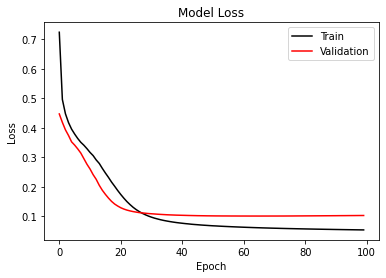

In [ ]:
model.loss_plot()

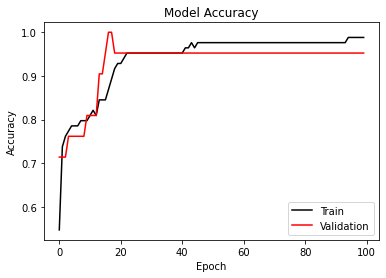

In [ ]:
model.accuracy_plot()

In [ ]:
y_pred = model.predict(X_test_std, batch_size)
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 18]])

Testing model.evaluate()

In [ ]:
cost, accuracy = model.evaluate(X_test_std, y_test, batch_size)
print('\nTest Accuracy =', round(accuracy*100, 2))

100%|██████████| 23/23 [00:00<00:00, 2890.20it/s]


Test Accuracy = 100.0


### Validating model using MNIST Dataset

Check this [page](https://en.wikipedia.org/wiki/MNIST_database) (link to an external website) to know more about **MNIST dataset**

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]**2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]**2)
X_train = X_train/255
X_test = X_test/255

utility = Utility()

# train validation split
X_train_new, X_val, y_train_new, y_val = utility.train_test_split(X_train, y_train, test_ratio=0.2, seed=42)

Y_1hot_train, _ = utility.onehot(y_train_new)

lr, epochs, batch_size = 0.8, 60, 400
input_dim = X_train_new.shape[1]
output_dim = Y_1hot_train.shape[1]

In [ ]:
model = MLP()

model.add(Dense(neurons=240, 
                activation_type='tanh', 
                input_dim=input_dim, 
                seed=42, 
                weight_initializer_type='xavier_normal'))

model.add(Dense(neurons=200, 
                activation_type='relu', 
                seed=42, 
                weight_initializer_type='he_normal'))

model.add(Dense(neurons=output_dim, 
                activation_type='softmax', 
                weight_initializer_type='random_normal', 
                seed=42))

In [ ]:
model.summary()

Model: MLP
--------------------------------------------------------------------------------------
Layer (type)                                 Output Shape              # of Parameters
input_1 (Input)                              (None, 784)               0              
--------------------------------------------------------------------------------------
dense_1 (Dense)                              (None, 240)               188400         
--------------------------------------------------------------------------------------
dense_2 (Dense)                              (None, 200)               48200          
--------------------------------------------------------------------------------------
dense_3 (Dense)                              (None, 10)                2010           
Total params: 238610
Trainable params: 238610
Non-trainable params: 0
--------------------------------------------------------------------------------------


In [ ]:
model.compile(cost_type='cross-entropy', optimizer_type='adam')

In [ ]:
LR_decay = LearningRateDecay()

model.fit(X_train_new, Y_1hot_train, epochs=epochs, batch_size=batch_size, lr=lr, X_val=X_val, y_val=y_val, verbose=1,
          lr_decay=LR_decay.constant, lr_0=lr)

Epoch: 1/60 

100%|██████████| 120/120 [00:18<00:00,  6.53it/s]


Training Loss: 3.2244 - Training Accuracy: 0.7885 - Validation Loss: 2.6541 - Validation Accuracy: 0.8525
Epoch: 2/60 

100%|██████████| 120/120 [00:13<00:00,  8.92it/s]


Training Loss: 2.6662 - Training Accuracy: 0.8632 - Validation Loss: 2.6166 - Validation Accuracy: 0.8615
Epoch: 3/60 

100%|██████████| 120/120 [00:08<00:00, 14.10it/s]


Training Loss: 2.6223 - Training Accuracy: 0.8752 - Validation Loss: 2.6038 - Validation Accuracy: 0.8652
Epoch: 4/60 

100%|██████████| 120/120 [00:08<00:00, 14.54it/s]


Training Loss: 2.5989 - Training Accuracy: 0.8809 - Validation Loss: 2.5878 - Validation Accuracy: 0.8704
Epoch: 5/60 

100%|██████████| 120/120 [00:08<00:00, 14.34it/s]


Training Loss: 2.5792 - Training Accuracy: 0.8869 - Validation Loss: 2.5699 - Validation Accuracy: 0.8772
Epoch: 6/60 

100%|██████████| 120/120 [00:10<00:00, 11.97it/s]


Training Loss: 2.5673 - Training Accuracy: 0.8903 - Validation Loss: 2.5693 - Validation Accuracy: 0.8774
Epoch: 7/60 

100%|██████████| 120/120 [00:08<00:00, 14.39it/s]


Training Loss: 2.5645 - Training Accuracy: 0.8905 - Validation Loss: 2.565 - Validation Accuracy: 0.8791
Epoch: 8/60 

100%|██████████| 120/120 [00:08<00:00, 14.46it/s]


Training Loss: 2.5584 - Training Accuracy: 0.892 - Validation Loss: 2.5678 - Validation Accuracy: 0.8802
Epoch: 9/60 

100%|██████████| 120/120 [00:08<00:00, 14.07it/s]


Training Loss: 2.548 - Training Accuracy: 0.896 - Validation Loss: 2.5799 - Validation Accuracy: 0.8772
Epoch: 10/60 

100%|██████████| 120/120 [00:08<00:00, 14.20it/s]


Training Loss: 2.5463 - Training Accuracy: 0.8961 - Validation Loss: 2.5883 - Validation Accuracy: 0.8777
Epoch: 11/60 

100%|██████████| 120/120 [00:08<00:00, 14.53it/s]


Training Loss: 2.5483 - Training Accuracy: 0.8957 - Validation Loss: 2.6127 - Validation Accuracy: 0.8751
Epoch: 12/60 

100%|██████████| 120/120 [00:08<00:00, 13.49it/s]


Training Loss: 2.5489 - Training Accuracy: 0.8956 - Validation Loss: 2.647 - Validation Accuracy: 0.8672
Epoch: 13/60 

100%|██████████| 120/120 [00:09<00:00, 12.70it/s]


Training Loss: 2.5475 - Training Accuracy: 0.8953 - Validation Loss: 2.6164 - Validation Accuracy: 0.8731
Epoch: 14/60 

100%|██████████| 120/120 [00:08<00:00, 14.43it/s]


Training Loss: 2.5484 - Training Accuracy: 0.8953 - Validation Loss: 2.6148 - Validation Accuracy: 0.8747
Epoch: 15/60 

100%|██████████| 120/120 [00:08<00:00, 14.26it/s]


Training Loss: 2.5459 - Training Accuracy: 0.8971 - Validation Loss: 2.597 - Validation Accuracy: 0.8794
Epoch: 16/60 

100%|██████████| 120/120 [00:08<00:00, 14.22it/s]


Training Loss: 2.5445 - Training Accuracy: 0.8973 - Validation Loss: 2.6307 - Validation Accuracy: 0.8767
Epoch: 17/60 

100%|██████████| 120/120 [00:08<00:00, 14.39it/s]


Training Loss: 2.5425 - Training Accuracy: 0.8978 - Validation Loss: 2.6487 - Validation Accuracy: 0.8746
Epoch: 18/60 

100%|██████████| 120/120 [00:08<00:00, 14.53it/s]


Training Loss: 2.5355 - Training Accuracy: 0.9004 - Validation Loss: 2.6066 - Validation Accuracy: 0.8814
Epoch: 19/60 

100%|██████████| 120/120 [00:08<00:00, 14.42it/s]


Training Loss: 0.8253 - Training Accuracy: 0.9421 - Validation Loss: 0.1725 - Validation Accuracy: 0.9575
Epoch: 20/60 

100%|██████████| 120/120 [00:08<00:00, 14.28it/s]


Training Loss: 0.0544 - Training Accuracy: 0.9829 - Validation Loss: 0.141 - Validation Accuracy: 0.9666
Epoch: 21/60 

100%|██████████| 120/120 [00:09<00:00, 13.10it/s]


Training Loss: 0.0344 - Training Accuracy: 0.9881 - Validation Loss: 0.1514 - Validation Accuracy: 0.9652
Epoch: 22/60 

100%|██████████| 120/120 [00:15<00:00,  7.81it/s]


Training Loss: 0.0245 - Training Accuracy: 0.9919 - Validation Loss: 0.1357 - Validation Accuracy: 0.97
Epoch: 23/60 

100%|██████████| 120/120 [00:09<00:00, 12.37it/s]


Training Loss: 0.0193 - Training Accuracy: 0.993 - Validation Loss: 0.129 - Validation Accuracy: 0.9733
Epoch: 24/60 

100%|██████████| 120/120 [00:08<00:00, 14.42it/s]


Training Loss: 0.0146 - Training Accuracy: 0.9942 - Validation Loss: 0.1589 - Validation Accuracy: 0.9694
Epoch: 25/60 

100%|██████████| 120/120 [00:08<00:00, 14.35it/s]


Training Loss: 0.0166 - Training Accuracy: 0.9943 - Validation Loss: 0.1481 - Validation Accuracy: 0.9718
Epoch: 26/60 

100%|██████████| 120/120 [00:08<00:00, 14.49it/s]


Training Loss: 0.0122 - Training Accuracy: 0.9957 - Validation Loss: 0.1388 - Validation Accuracy: 0.9726
Epoch: 27/60 

100%|██████████| 120/120 [00:08<00:00, 14.49it/s]


Training Loss: 0.0109 - Training Accuracy: 0.9961 - Validation Loss: 0.1529 - Validation Accuracy: 0.9698
Epoch: 28/60 

100%|██████████| 120/120 [00:08<00:00, 14.54it/s]


Training Loss: 0.0084 - Training Accuracy: 0.9971 - Validation Loss: 0.1318 - Validation Accuracy: 0.9743
Epoch: 29/60 

100%|██████████| 120/120 [00:08<00:00, 14.64it/s]


Training Loss: 0.0079 - Training Accuracy: 0.9971 - Validation Loss: 0.1396 - Validation Accuracy: 0.9716
Epoch: 30/60 

100%|██████████| 120/120 [00:08<00:00, 14.62it/s]


Training Loss: 0.0075 - Training Accuracy: 0.9973 - Validation Loss: 0.1491 - Validation Accuracy: 0.9729
Epoch: 31/60 

100%|██████████| 120/120 [00:08<00:00, 14.50it/s]


Training Loss: 0.0083 - Training Accuracy: 0.9974 - Validation Loss: 0.1701 - Validation Accuracy: 0.9685
Epoch: 32/60 

100%|██████████| 120/120 [00:08<00:00, 14.45it/s]


Training Loss: 0.0072 - Training Accuracy: 0.9976 - Validation Loss: 0.1486 - Validation Accuracy: 0.9718
Epoch: 33/60 

100%|██████████| 120/120 [00:08<00:00, 14.35it/s]


Training Loss: 0.0041 - Training Accuracy: 0.9988 - Validation Loss: 0.1316 - Validation Accuracy: 0.9762
Epoch: 34/60 

100%|██████████| 120/120 [00:08<00:00, 14.54it/s]


Training Loss: 0.0057 - Training Accuracy: 0.998 - Validation Loss: 0.1519 - Validation Accuracy: 0.9722
Epoch: 35/60 

100%|██████████| 120/120 [00:08<00:00, 14.58it/s]


Training Loss: 0.0053 - Training Accuracy: 0.9984 - Validation Loss: 0.1398 - Validation Accuracy: 0.9751
Epoch: 36/60 

100%|██████████| 120/120 [00:08<00:00, 14.35it/s]


Training Loss: 0.0113 - Training Accuracy: 0.9962 - Validation Loss: 0.186 - Validation Accuracy: 0.9691
Epoch: 37/60 

100%|██████████| 120/120 [00:08<00:00, 14.48it/s]


Training Loss: 0.0184 - Training Accuracy: 0.994 - Validation Loss: 0.1747 - Validation Accuracy: 0.9704
Epoch: 38/60 

100%|██████████| 120/120 [00:08<00:00, 14.38it/s]


Training Loss: 0.0278 - Training Accuracy: 0.9916 - Validation Loss: 0.1833 - Validation Accuracy: 0.9685
Epoch: 39/60 

100%|██████████| 120/120 [00:08<00:00, 14.47it/s]


Training Loss: 0.0188 - Training Accuracy: 0.9944 - Validation Loss: 0.1983 - Validation Accuracy: 0.9665
Epoch: 40/60 

100%|██████████| 120/120 [00:08<00:00, 14.48it/s]


Training Loss: 0.0245 - Training Accuracy: 0.9926 - Validation Loss: 0.2126 - Validation Accuracy: 0.9635
Epoch: 41/60 

100%|██████████| 120/120 [00:08<00:00, 14.54it/s]


Training Loss: 0.0181 - Training Accuracy: 0.9943 - Validation Loss: 0.197 - Validation Accuracy: 0.967
Epoch: 42/60 

100%|██████████| 120/120 [00:11<00:00, 10.90it/s]


Training Loss: 0.0111 - Training Accuracy: 0.9961 - Validation Loss: 0.1674 - Validation Accuracy: 0.9732
Epoch: 43/60 

100%|██████████| 120/120 [00:18<00:00,  6.44it/s]


Training Loss: 0.0099 - Training Accuracy: 0.9967 - Validation Loss: 0.1901 - Validation Accuracy: 0.9728
Epoch: 44/60 

100%|██████████| 120/120 [00:08<00:00, 14.48it/s]


Training Loss: 0.0129 - Training Accuracy: 0.9958 - Validation Loss: 0.236 - Validation Accuracy: 0.9662
Epoch: 45/60 

100%|██████████| 120/120 [00:08<00:00, 14.43it/s]


Training Loss: 0.0126 - Training Accuracy: 0.9962 - Validation Loss: 0.2029 - Validation Accuracy: 0.9702
Epoch: 46/60 

100%|██████████| 120/120 [00:08<00:00, 14.14it/s]


Training Loss: 0.0179 - Training Accuracy: 0.9946 - Validation Loss: 0.1968 - Validation Accuracy: 0.9719
Epoch: 47/60 

100%|██████████| 120/120 [00:08<00:00, 14.33it/s]


Training Loss: 0.016 - Training Accuracy: 0.9956 - Validation Loss: 0.2332 - Validation Accuracy: 0.9677
Epoch: 48/60 

100%|██████████| 120/120 [00:08<00:00, 14.20it/s]


Training Loss: 0.0221 - Training Accuracy: 0.9936 - Validation Loss: 0.2108 - Validation Accuracy: 0.9701
Epoch: 49/60 

100%|██████████| 120/120 [00:08<00:00, 13.95it/s]


Training Loss: 0.0131 - Training Accuracy: 0.9962 - Validation Loss: 0.2086 - Validation Accuracy: 0.97
Epoch: 50/60 

100%|██████████| 120/120 [00:08<00:00, 14.39it/s]


Training Loss: 0.0099 - Training Accuracy: 0.9971 - Validation Loss: 0.205 - Validation Accuracy: 0.9718
Epoch: 51/60 

100%|██████████| 120/120 [00:08<00:00, 14.36it/s]


Training Loss: 0.0114 - Training Accuracy: 0.9967 - Validation Loss: 0.2421 - Validation Accuracy: 0.9691
Epoch: 52/60 

100%|██████████| 120/120 [00:08<00:00, 14.33it/s]


Training Loss: 0.0079 - Training Accuracy: 0.9975 - Validation Loss: 0.1884 - Validation Accuracy: 0.9738
Epoch: 53/60 

100%|██████████| 120/120 [00:08<00:00, 14.31it/s]


Training Loss: 0.0074 - Training Accuracy: 0.9977 - Validation Loss: 0.1989 - Validation Accuracy: 0.9738
Epoch: 54/60 

100%|██████████| 120/120 [00:09<00:00, 13.22it/s]


Training Loss: 0.0072 - Training Accuracy: 0.9977 - Validation Loss: 0.1945 - Validation Accuracy: 0.9753
Epoch: 55/60 

100%|██████████| 120/120 [00:08<00:00, 13.40it/s]


Training Loss: 0.0051 - Training Accuracy: 0.9983 - Validation Loss: 0.2097 - Validation Accuracy: 0.974
Epoch: 56/60 

100%|██████████| 120/120 [00:08<00:00, 14.45it/s]


Training Loss: 0.009 - Training Accuracy: 0.9975 - Validation Loss: 0.2262 - Validation Accuracy: 0.9714
Epoch: 57/60 

100%|██████████| 120/120 [00:08<00:00, 14.19it/s]


Training Loss: 0.012 - Training Accuracy: 0.9964 - Validation Loss: 0.2335 - Validation Accuracy: 0.9711
Epoch: 58/60 

 90%|█████████ | 108/120 [00:07<00:00, 14.24it/s]

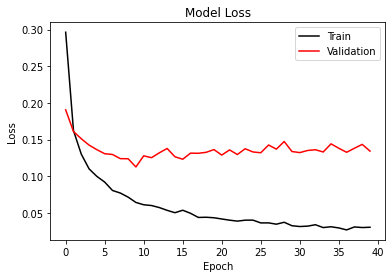

In [ ]:
model.loss_plot()

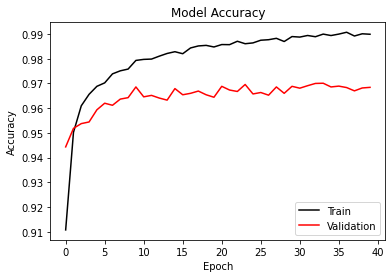

In [ ]:
model.accuracy_plot()

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 953,    0,    8,    1,    3,    1,    7,    2,    3,    2],
       [   0, 1123,    4,    2,    0,    0,    2,    0,    4,    0],
       [   1,    0, 1009,    5,    3,    0,    2,    6,    6,    0],
       [   1,    0,   12,  978,    0,   10,    0,    4,    3,    2],
       [   1,    2,    2,    0,  955,    1,    4,    6,    0,   11],
       [   1,    1,    0,   13,    2,  859,    6,    2,    6,    2],
       [   3,    3,    1,    0,    7,    6,  936,    0,    2,    0],
       [   1,    7,   14,    3,    5,    0,    0,  991,    3,    4],
       [   5,    2,    7,   10,    5,    4,    7,    6,  922,    6],
       [   2,    5,    1,    6,   14,    6,    0,    8,    5,  962]])

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Error Rate =',round((1-acc)*100, 2))
print('Accuracy =',round((acc)*100, 2))

Error Rate = 3.12
Accuracy = 96.88


### Validating model using MNIST Dataset + Batch Normalization and Dropout

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]**2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]**2)
X_train = X_train/255
X_test = X_test/255

utility = Utility()

# train validation split
X_train_new, X_val, y_train_new, y_val = utility.train_test_split(X_train, y_train, test_ratio=0.2, seed=42)

Y_1hot_train, _ = utility.onehot(y_train_new)

lr, epochs, batch_size = 0.8, 40, 200
input_dim = X_train_new.shape[1]
output_dim = Y_1hot_train.shape[1]

In [ ]:
model = MLP()

model.add(Dense(neurons=240, 
                activation_type='relu', 
                input_dim=input_dim, 
                seed=42, 
                weight_initializer_type='xavier_normal'))

model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Dense(neurons=output_dim, 
                activation_type='softmax', 
                weight_initializer_type='he_normal', 
                seed=42))

In [ ]:
model.compile(cost_type='cross-entropy', optimizer_type='adam')

In [ ]:
model.summary()

Model: MLP
--------------------------------------------------------------------------------------
Layer (type)                                 Output Shape              # of Parameters
input_1 (Input)                              (None, 784)               0              
--------------------------------------------------------------------------------------
dense_1 (Dense)                              (None, 240)               188400         
--------------------------------------------------------------------------------------
dropout_1 (Dropout)                          (None, 240)               0              
--------------------------------------------------------------------------------------
batchnormalization_1 (BatchNormalization)    (None, 240)               960            
--------------------------------------------------------------------------------------
dense_2 (Dense)                              (None, 10)                2410           
Total params: 191770
Trainable p

In [ ]:
model.fit(X_train_new, Y_1hot_train, epochs=epochs, batch_size=batch_size, lr=lr, X_val=X_val, y_val=y_val, verbose=1)

Epoch: 1/40 

100%|██████████| 240/240 [00:06<00:00, 35.19it/s]


Training Loss: 0.2963 - Training Accuracy: 0.9108 - Validation Loss: 0.1905 - Validation Accuracy: 0.9443
Epoch: 2/40 

100%|██████████| 240/240 [00:07<00:00, 33.34it/s]


Training Loss: 0.1622 - Training Accuracy: 0.9502 - Validation Loss: 0.1609 - Validation Accuracy: 0.9518
Epoch: 3/40 

100%|██████████| 240/240 [00:06<00:00, 37.13it/s]


Training Loss: 0.1301 - Training Accuracy: 0.961 - Validation Loss: 0.151 - Validation Accuracy: 0.9538
Epoch: 4/40 

100%|██████████| 240/240 [00:06<00:00, 38.86it/s]


Training Loss: 0.1099 - Training Accuracy: 0.9656 - Validation Loss: 0.1424 - Validation Accuracy: 0.9544
Epoch: 5/40 

100%|██████████| 240/240 [00:06<00:00, 38.94it/s]


Training Loss: 0.0997 - Training Accuracy: 0.9688 - Validation Loss: 0.1361 - Validation Accuracy: 0.9593
Epoch: 6/40 

100%|██████████| 240/240 [00:06<00:00, 39.08it/s]


Training Loss: 0.092 - Training Accuracy: 0.9702 - Validation Loss: 0.1306 - Validation Accuracy: 0.962
Epoch: 7/40 

100%|██████████| 240/240 [00:06<00:00, 39.14it/s]


Training Loss: 0.0805 - Training Accuracy: 0.9739 - Validation Loss: 0.1296 - Validation Accuracy: 0.9612
Epoch: 8/40 

100%|██████████| 240/240 [00:06<00:00, 38.87it/s]


Training Loss: 0.077 - Training Accuracy: 0.9751 - Validation Loss: 0.1239 - Validation Accuracy: 0.9637
Epoch: 9/40 

100%|██████████| 240/240 [00:06<00:00, 38.91it/s]


Training Loss: 0.0714 - Training Accuracy: 0.9758 - Validation Loss: 0.1237 - Validation Accuracy: 0.9642
Epoch: 10/40 

100%|██████████| 240/240 [00:06<00:00, 39.13it/s]


Training Loss: 0.0642 - Training Accuracy: 0.9793 - Validation Loss: 0.1126 - Validation Accuracy: 0.9686
Epoch: 11/40 

100%|██████████| 240/240 [00:11<00:00, 20.89it/s]


Training Loss: 0.061 - Training Accuracy: 0.9797 - Validation Loss: 0.1277 - Validation Accuracy: 0.9646
Epoch: 12/40 

100%|██████████| 240/240 [00:14<00:00, 16.65it/s]


Training Loss: 0.06 - Training Accuracy: 0.9799 - Validation Loss: 0.1252 - Validation Accuracy: 0.9652
Epoch: 13/40 

100%|██████████| 240/240 [00:07<00:00, 32.92it/s]


Training Loss: 0.0572 - Training Accuracy: 0.981 - Validation Loss: 0.1318 - Validation Accuracy: 0.9641
Epoch: 14/40 

100%|██████████| 240/240 [00:06<00:00, 36.05it/s]


Training Loss: 0.0534 - Training Accuracy: 0.9821 - Validation Loss: 0.1378 - Validation Accuracy: 0.9632
Epoch: 15/40 

100%|██████████| 240/240 [00:06<00:00, 39.32it/s]


Training Loss: 0.0502 - Training Accuracy: 0.9828 - Validation Loss: 0.1265 - Validation Accuracy: 0.9679
Epoch: 16/40 

100%|██████████| 240/240 [00:06<00:00, 39.37it/s]


Training Loss: 0.0535 - Training Accuracy: 0.982 - Validation Loss: 0.1231 - Validation Accuracy: 0.9654
Epoch: 17/40 

100%|██████████| 240/240 [00:06<00:00, 39.31it/s]


Training Loss: 0.0494 - Training Accuracy: 0.9844 - Validation Loss: 0.1314 - Validation Accuracy: 0.966
Epoch: 18/40 

100%|██████████| 240/240 [00:06<00:00, 39.67it/s]


Training Loss: 0.0437 - Training Accuracy: 0.9852 - Validation Loss: 0.1312 - Validation Accuracy: 0.9669
Epoch: 19/40 

100%|██████████| 240/240 [00:06<00:00, 39.08it/s]


Training Loss: 0.044 - Training Accuracy: 0.9854 - Validation Loss: 0.1325 - Validation Accuracy: 0.9654
Epoch: 20/40 

100%|██████████| 240/240 [00:06<00:00, 38.29it/s]


Training Loss: 0.0433 - Training Accuracy: 0.9848 - Validation Loss: 0.1363 - Validation Accuracy: 0.9644
Epoch: 21/40 

100%|██████████| 240/240 [00:06<00:00, 39.02it/s]


Training Loss: 0.0416 - Training Accuracy: 0.9857 - Validation Loss: 0.1288 - Validation Accuracy: 0.9688
Epoch: 22/40 

100%|██████████| 240/240 [00:06<00:00, 39.07it/s]


Training Loss: 0.04 - Training Accuracy: 0.9857 - Validation Loss: 0.1358 - Validation Accuracy: 0.9673
Epoch: 23/40 

100%|██████████| 240/240 [00:06<00:00, 38.89it/s]


Training Loss: 0.0387 - Training Accuracy: 0.9871 - Validation Loss: 0.1295 - Validation Accuracy: 0.9668
Epoch: 24/40 

100%|██████████| 240/240 [00:06<00:00, 38.62it/s]


Training Loss: 0.04 - Training Accuracy: 0.9861 - Validation Loss: 0.1374 - Validation Accuracy: 0.9696
Epoch: 25/40 

100%|██████████| 240/240 [00:07<00:00, 30.90it/s]


Training Loss: 0.0401 - Training Accuracy: 0.9864 - Validation Loss: 0.133 - Validation Accuracy: 0.9658
Epoch: 26/40 

100%|██████████| 240/240 [00:06<00:00, 39.35it/s]


Training Loss: 0.0363 - Training Accuracy: 0.9875 - Validation Loss: 0.1319 - Validation Accuracy: 0.9663
Epoch: 27/40 

100%|██████████| 240/240 [00:06<00:00, 35.62it/s]


Training Loss: 0.0363 - Training Accuracy: 0.9877 - Validation Loss: 0.1425 - Validation Accuracy: 0.9652
Epoch: 28/40 

100%|██████████| 240/240 [00:06<00:00, 37.87it/s]


Training Loss: 0.0345 - Training Accuracy: 0.9882 - Validation Loss: 0.1369 - Validation Accuracy: 0.9686
Epoch: 29/40 

100%|██████████| 240/240 [00:06<00:00, 35.04it/s]


Training Loss: 0.0371 - Training Accuracy: 0.987 - Validation Loss: 0.1473 - Validation Accuracy: 0.966
Epoch: 30/40 

100%|██████████| 240/240 [00:06<00:00, 35.36it/s]


Training Loss: 0.0324 - Training Accuracy: 0.989 - Validation Loss: 0.1336 - Validation Accuracy: 0.9688
Epoch: 31/40 

100%|██████████| 240/240 [00:07<00:00, 30.24it/s]


Training Loss: 0.0313 - Training Accuracy: 0.9888 - Validation Loss: 0.1321 - Validation Accuracy: 0.9681
Epoch: 32/40 

100%|██████████| 240/240 [00:06<00:00, 34.49it/s]


Training Loss: 0.0318 - Training Accuracy: 0.9894 - Validation Loss: 0.135 - Validation Accuracy: 0.9691
Epoch: 33/40 

100%|██████████| 240/240 [00:07<00:00, 33.35it/s]


Training Loss: 0.0338 - Training Accuracy: 0.9889 - Validation Loss: 0.136 - Validation Accuracy: 0.97
Epoch: 34/40 

100%|██████████| 240/240 [00:07<00:00, 32.97it/s]


Training Loss: 0.0299 - Training Accuracy: 0.99 - Validation Loss: 0.133 - Validation Accuracy: 0.9701
Epoch: 35/40 

100%|██████████| 240/240 [00:07<00:00, 33.01it/s]


Training Loss: 0.031 - Training Accuracy: 0.9894 - Validation Loss: 0.1441 - Validation Accuracy: 0.9686
Epoch: 36/40 

100%|██████████| 240/240 [00:07<00:00, 32.94it/s]


Training Loss: 0.0294 - Training Accuracy: 0.99 - Validation Loss: 0.1381 - Validation Accuracy: 0.9689
Epoch: 37/40 

100%|██████████| 240/240 [00:07<00:00, 32.58it/s]


Training Loss: 0.0267 - Training Accuracy: 0.9907 - Validation Loss: 0.1326 - Validation Accuracy: 0.9683
Epoch: 38/40 

100%|██████████| 240/240 [00:08<00:00, 29.64it/s]


Training Loss: 0.0308 - Training Accuracy: 0.9892 - Validation Loss: 0.1381 - Validation Accuracy: 0.967
Epoch: 39/40 

100%|██████████| 240/240 [00:09<00:00, 26.12it/s]


Training Loss: 0.0299 - Training Accuracy: 0.9901 - Validation Loss: 0.1434 - Validation Accuracy: 0.9682
Epoch: 40/40 

100%|██████████| 240/240 [00:07<00:00, 31.81it/s]


Training Loss: 0.0303 - Training Accuracy: 0.9899 - Validation Loss: 0.1342 - Validation Accuracy: 0.9684


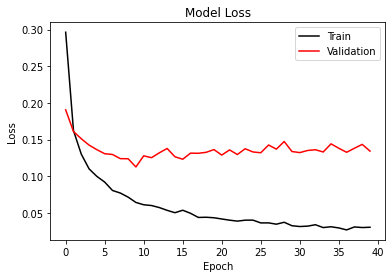

In [ ]:
model.loss_plot()

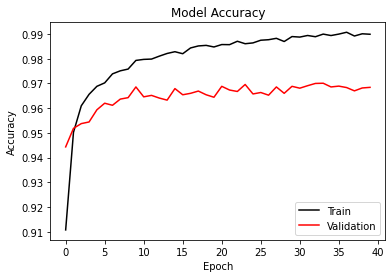

In [ ]:
model.accuracy_plot()

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 962,    0,    3,    1,    0,    2,    7,    2,    2,    1],
       [   0, 1120,    4,    1,    0,    0,    4,    0,    6,    0],
       [   4,    0, 1010,    3,    2,    0,    2,    6,    5,    0],
       [   1,    2,    8,  977,    0,    9,    0,    7,    2,    4],
       [   1,    2,    3,    0,  952,    1,    3,    5,    1,   14],
       [   1,    1,    1,    8,    3,  867,    6,    1,    3,    1],
       [   5,    2,    5,    0,    6,    4,  931,    0,    5,    0],
       [   3,    6,   16,    4,    2,    0,    1,  987,    0,    9],
       [   3,    1,   10,   15,    5,    6,    4,    3,  920,    7],
       [   2,    3,    0,    8,   11,    7,    1,    8,    9,  960]])

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Error Rate =',round((1-acc)*100, 2))
print('Accuracy =',round((acc)*100, 2))

Error Rate = 3.14
Accuracy = 96.86
